In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [23]:
df = pd.read_csv('/Users/samaguiar/Desktop/university-of-the-cumberlands/MSDS_530/week_1/xAPI-Edu-Data.csv')

In [24]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [25]:
df.isnull().value_counts()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  StudentAbsenceDays  Class
False   False        False         False    False    False      False  False     False     False        False             False              False       False                  False                     False               False    480
Name: count, dtype: int64

In [26]:
#get 10 random samples
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,41,33,Yes,Bad,Under-7,H
68,F,USA,USA,HighSchool,G-12,A,IT,F,Mum,70,69,35,30,Yes,Good,Under-7,H
74,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,12,0,6,13,No,Bad,Under-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,2,7,4,8,No,Bad,Above-7,L
21,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,10,12,4,80,No,Bad,Under-7,M
298,M,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Father,18,17,26,34,No,Good,Above-7,M
71,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,29,22,9,20,Yes,Good,Under-7,M
266,M,Jordan,Jordan,MiddleSchool,G-06,A,English,F,Father,19,80,12,17,Yes,Good,Above-7,M
419,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,S,Father,99,96,89,84,Yes,Good,Under-7,H
73,F,KW,KuwaIT,MiddleSchool,G-07,A,English,F,Father,19,30,26,19,Yes,Bad,Above-7,M


In [27]:
df['raisedhands'].dtypes

dtype('int64')

In [28]:
df['Topic'].dtypes

dtype('O')

In [29]:
df['GradeID'].dtypes

dtype('O')

In [30]:
# get statistics for interval data
df['raisedhands'].describe()

count    480.000000
mean      46.775000
std       30.779223
min        0.000000
25%       15.750000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64

In [31]:
st.mode(df['raisedhands'])

10

Text(0.5, 1.0, 'Engagement: Frequency vs. Number of Raised Hands')

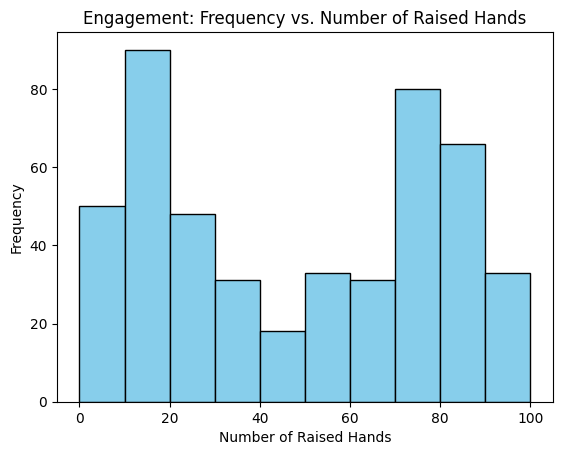

In [32]:
# Create a histogram for interval data
plt.hist(df['raisedhands'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Raised Hands')
plt.ylabel('Frequency')
plt.title('Engagement: Frequency vs. Number of Raised Hands')

([], [])

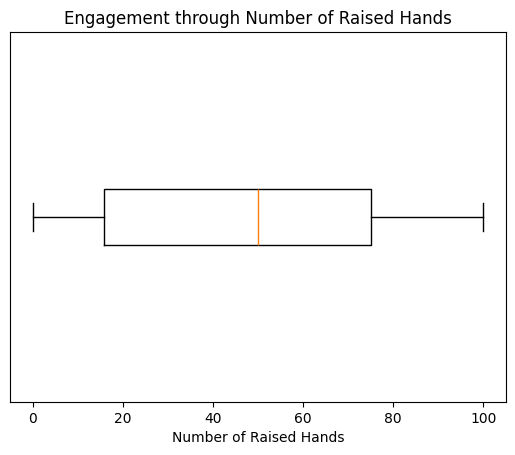

In [33]:
# Create a histogram for interval data
plt.boxplot(df['raisedhands'], vert=False)
plt.xlabel('Number of Raised Hands')
plt.title('Engagement through Number of Raised Hands')

# Customize the y-axis labels to be empty strings
plt.yticks([])

In [34]:
# explore ordinal data
df['GradeID'].describe()

count      480
unique      10
top       G-02
freq       147
Name: GradeID, dtype: object

In [35]:
df['GradeID'].shape

(480,)

In [36]:
df['GradeID'].value_counts().reset_index()

,GradeID,count
0,G-02,147
1,G-08,116
2,G-07,101
3,G-04,48
4,G-06,32
5,G-11,13
6,G-12,11
7,G-09,5
8,G-10,4
9,G-05,3


In [37]:
# Rename "G_0{i}" to "Grade {i}" or G-{i} to Grade {i}
for i in range(2,13):
    if i<10:
        old_val = f'G-0{i}'
    else:
        old_val = f'G-{i}'
    new_val = f'Grade {i}'
    df['GradeID'] = df['GradeID'].replace(old_val, new_val)


In [38]:
grade_counts = df['GradeID'].value_counts()
grade_counts

GradeID
Grade 2     147
Grade 8     116
Grade 7     101
Grade 4      48
Grade 6      32
Grade 11     13
Grade 12     11
Grade 9       5
Grade 10      4
Grade 5       3
Name: count, dtype: int64

In [39]:
# Define the custom order for the x-axis
custom_order = []

for i in range(2,13):
    new_grade = f'Grade {i}'
    custom_order.append(new_grade)


In [40]:
custom_order

['Grade 2',
 'Grade 3',
 'Grade 4',
 'Grade 5',
 'Grade 6',
 'Grade 7',
 'Grade 8',
 'Grade 9',
 'Grade 10',
 'Grade 11',
 'Grade 12']

In [41]:
grade_counts_df = grade_counts.reset_index()
grade_counts_df

,GradeID,count
0,Grade 2,147
1,Grade 8,116
2,Grade 7,101
3,Grade 4,48
4,Grade 6,32
5,Grade 11,13
6,Grade 12,11
7,Grade 9,5
8,Grade 10,4
9,Grade 5,3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Grade 2'),
  Text(1, 0, 'Grade 3'),
  Text(2, 0, 'Grade 4'),
  Text(3, 0, 'Grade 5'),
  Text(4, 0, 'Grade 6'),
  Text(5, 0, 'Grade 7'),
  Text(6, 0, 'Grade 8'),
  Text(7, 0, 'Grade 9'),
  Text(8, 0, 'Grade 10'),
  Text(9, 0, 'Grade 11'),
  Text(10, 0, 'Grade 12')])

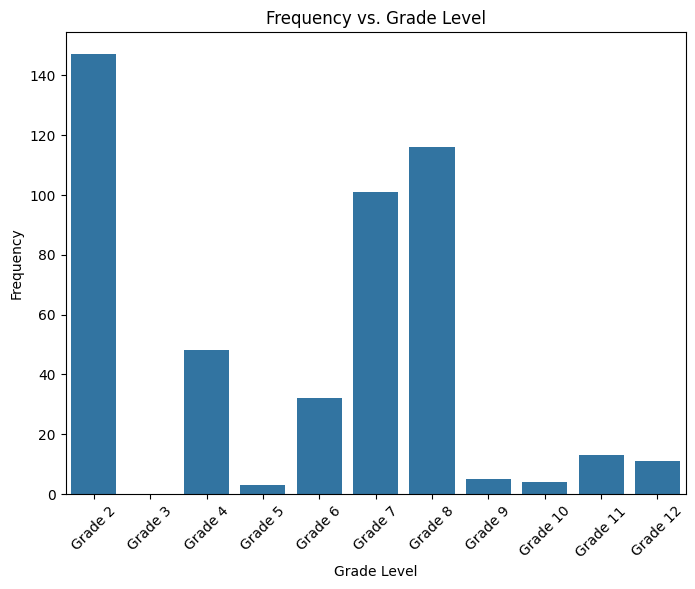

In [42]:
# Create a bar plot with the custom order
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x='GradeID', y='count', data=grade_counts_df, order=custom_order)
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.title('Frequency vs. Grade Level')
plt.xticks(rotation=45)


In [43]:
# look at classes - explore nominal data 
df['Topic'].describe()

count     480
unique     12
top        IT
freq       95
Name: Topic, dtype: object

In [44]:
df['Topic'].value_counts()

Topic
IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: count, dtype: int64

In [45]:
df['Topic'].count()

480

In [46]:
topic_counts_df = df['Topic'].value_counts().reset_index()
topic_counts_df

,Topic,count
0,IT,95
1,French,65
2,Arabic,59
3,Science,51
4,English,45
5,Biology,30
6,Spanish,25
7,Chemistry,24
8,Geology,24
9,Quran,22


In [47]:
percentages = []
for c in topic_counts_df['count']:
    percent = round((c/df['Topic'].count())*100, 2)
    percentages.append(percent)

percentages

[19.79, 13.54, 12.29, 10.62, 9.38, 6.25, 5.21, 5.0, 5.0, 4.58, 4.38, 3.96]

In [48]:
topic_counts_df['Percentage']=percentages
topic_counts_df

,Topic,count,Percentage
0,IT,95,19.79
1,French,65,13.54
2,Arabic,59,12.29
3,Science,51,10.62
4,English,45,9.38
5,Biology,30,6.25
6,Spanish,25,5.21
7,Chemistry,24,5.00
8,Geology,24,5.00
9,Quran,22,4.58


In [49]:
# create a pie chart

# Sort the DataFrame in descending order by count
topic_counts_df = topic_counts_df.sort_values(by='count', ascending=False)
topic_counts_df


,Topic,count,Percentage
0,IT,95,19.79
1,French,65,13.54
2,Arabic,59,12.29
3,Science,51,10.62
4,English,45,9.38
5,Biology,30,6.25
6,Spanish,25,5.21
7,Chemistry,24,5.00
8,Geology,24,5.00
9,Quran,22,4.58


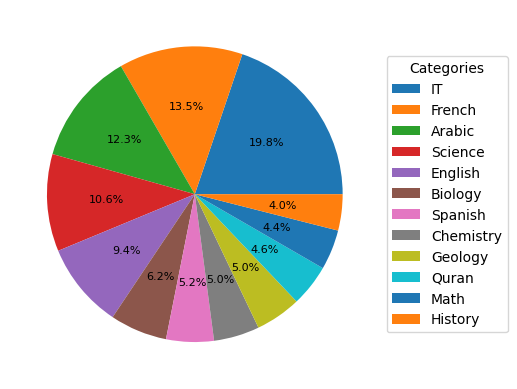

In [51]:
plt.pie(topic_counts_df['count'], autopct='%1.1f%%', textprops={'fontsize': 8})
plt.legend(labels=topic_counts_df['Topic'], title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))



In [54]:
#identify 10 colors to better diferentiate
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "yellow", "tan", "#ADD8E6", "#90EE90"]


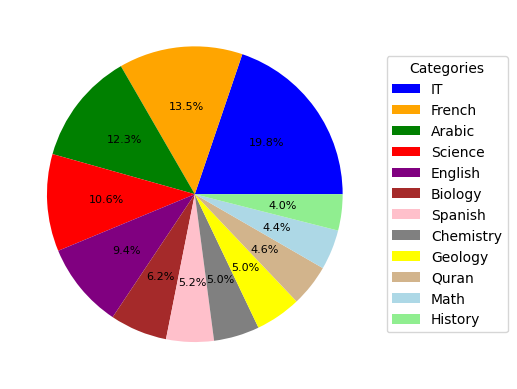

In [55]:
plt.pie(topic_counts_df['count'], autopct='%1.1f%%', textprops={'fontsize': 8}, colors=colors)
plt.legend(labels=topic_counts_df['Topic'], title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))


In [57]:
# Initialize an empty list for cumulative percentages
cumulative_percentage = []
# Initialize a variable to keep track of the cumulative sum
cumulative_sum = 0

for percent in percentages:
    # Add the current percentage to the cumulative sum
    cumulative_sum += percent
    # Append the cumulative sum to the new list
    cumulative_percentage.append(round(cumulative_sum, 2))

cumulative_percentage

[19.79,
 33.33,
 45.62,
 56.24,
 65.62,
 71.87,
 77.08,
 82.08,
 87.08,
 91.66,
 96.04,
 100.0]

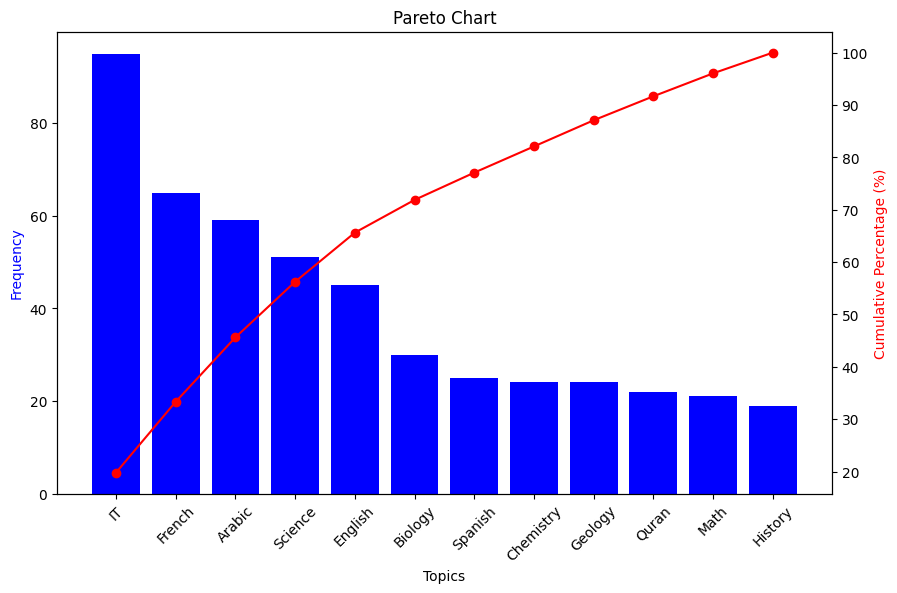

In [58]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for frequencies
ax1.bar(topic_counts_df['Topic'], topic_counts_df['count'], color='b')
ax1.set_xlabel('Topics')
ax1.set_ylabel('Frequency', color='b')
plt.xticks(rotation=45)

# Secondary vertical axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(topic_counts_df['Topic'], cumulative_percentage, marker='o', color='r')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
plt.title('Pareto Chart')
plt.show()